In [1]:
#!pip install tabulate
from coin_game_env import CoinGameEnv
from input_agent import InputAgent
from random_agent import RandomAgent
from minimax_agent import MinimaxAgent
from expectimax_agent import ExpectimaxAgent
from play import play_vs_other_agent
from UONI import UONI

In [2]:
env = CoinGameEnv(grid_size=5)
input_agent = InputAgent()

Input Agents

In [3]:
#play_vs_other_agent(env, agent1=input_agent, agent2=input_agent, render=True)

Random Agents

In [4]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=RandomAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

2

Random Agent vs UONI (Universal Optimization Neural Interface)

In [5]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def print_graph(ws, level):
    winners = ["UONI", "OTHER"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:00<00:00, 45.61it/s]


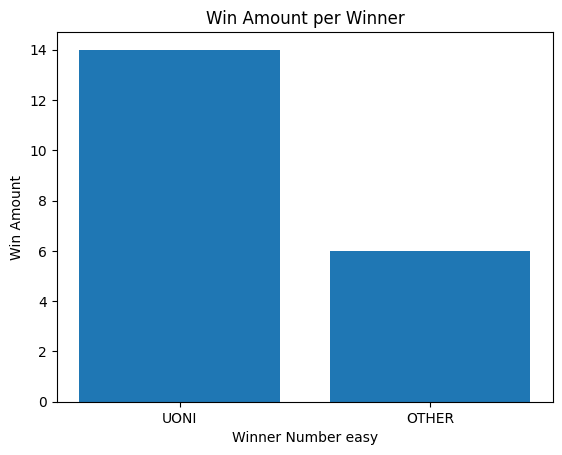

100%|██████████| 20/20 [00:01<00:00, 18.60it/s]


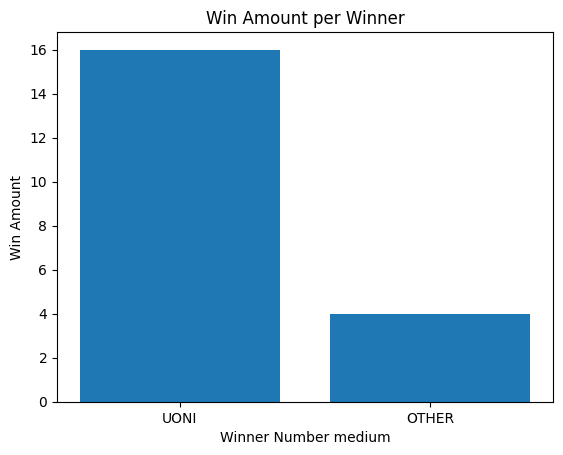

100%|██████████| 20/20 [00:01<00:00, 16.04it/s]


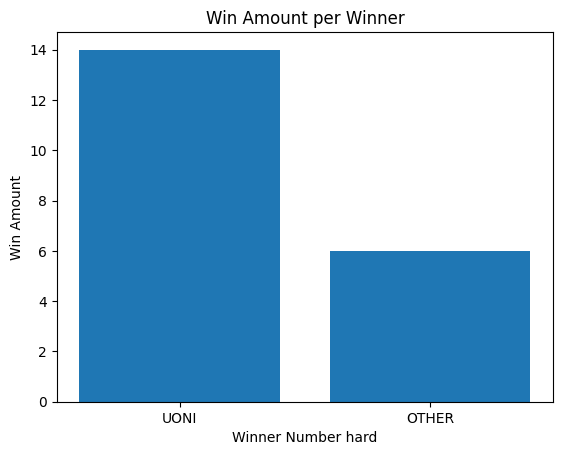

In [6]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=RandomAgent(2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=RandomAgent(1), agent2=UONI(2, level), render=False))
    print_graph(ws[level], level)

# Minimax

In [7]:
play_vs_other_agent(env, agent1=UONI(1, 'hard'), agent2=MinimaxAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     |     | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   |     | O   | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

2

In [8]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=MinimaxAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   |     | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   |     |     | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

In [9]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def minimax_graph(ws, level):
    winners = ["UONI", "Minimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

### DEPTH = 1

100%|██████████| 20/20 [00:00<00:00, 22.88it/s]


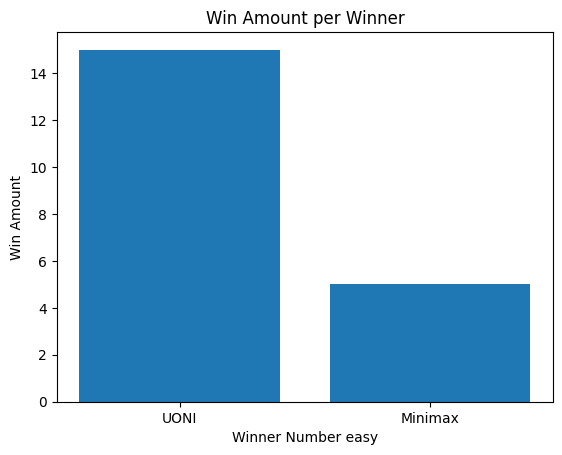

100%|██████████| 20/20 [00:01<00:00, 15.99it/s]


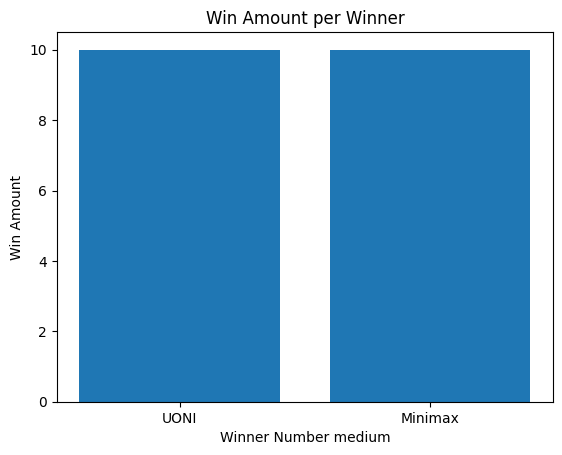

100%|██████████| 20/20 [00:01<00:00, 10.70it/s]


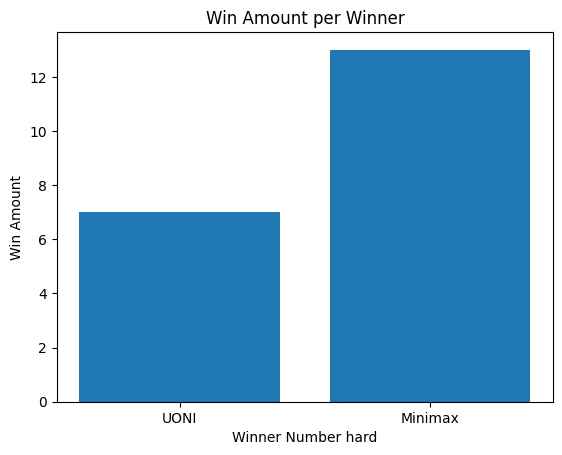

In [10]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=MinimaxAgent(2, 1), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=MinimaxAgent(1, 1), agent2=UONI(2, level), render=False))
    minimax_graph(ws[level], level)

### DEPTH = 2

100%|██████████| 20/20 [00:00<00:00, 22.24it/s]


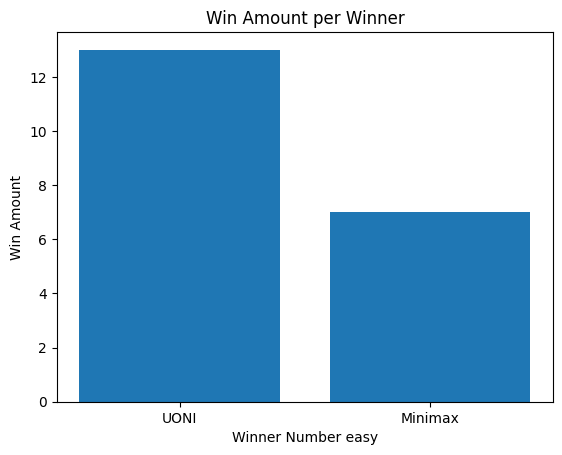

100%|██████████| 20/20 [00:01<00:00, 16.23it/s]


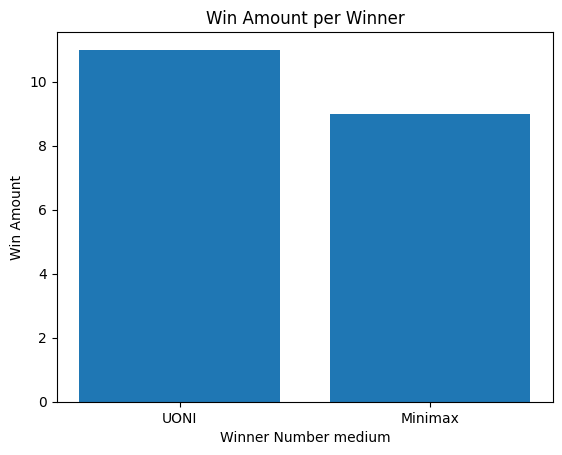

100%|██████████| 20/20 [00:02<00:00,  9.10it/s]


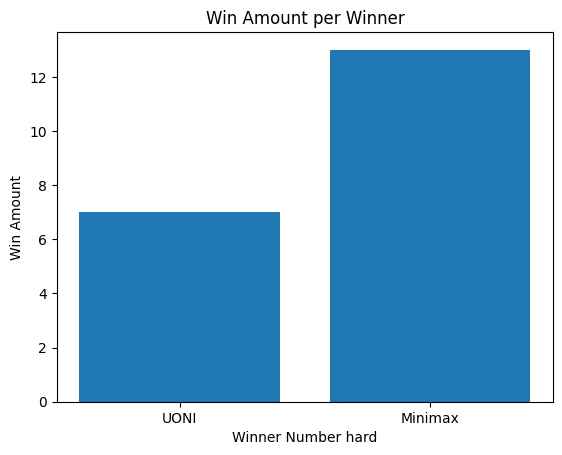

In [11]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=MinimaxAgent(2, 2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=MinimaxAgent(1, 2), agent2=UONI(2, level), render=False))
    minimax_graph(ws[level], level)

### DEPTH = 3

100%|██████████| 20/20 [00:00<00:00, 26.25it/s]


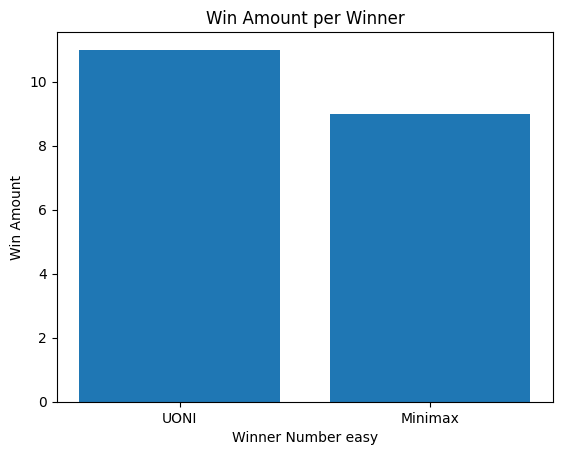

100%|██████████| 20/20 [00:01<00:00, 13.12it/s]


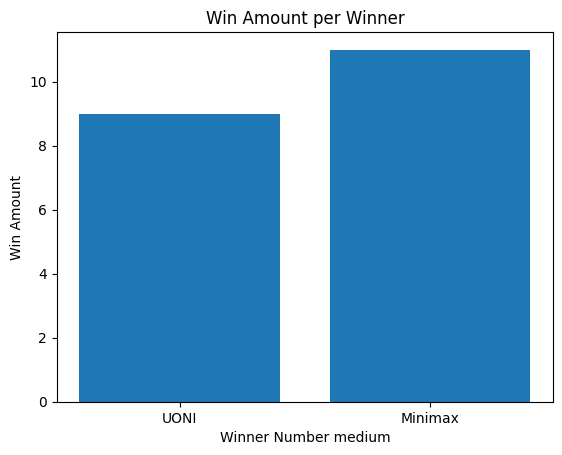

100%|██████████| 20/20 [00:02<00:00,  9.07it/s]


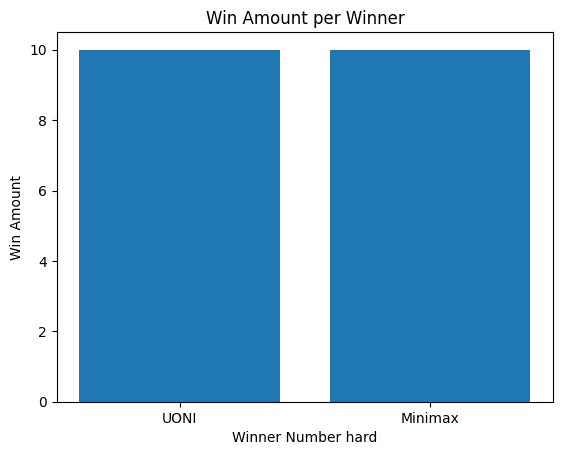

In [12]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=MinimaxAgent(2, 3), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=MinimaxAgent(1, 3), agent2=UONI(2, level), render=False))
    minimax_graph(ws[level], level)

### DEPTH = 4

100%|██████████| 20/20 [00:01<00:00, 17.32it/s]


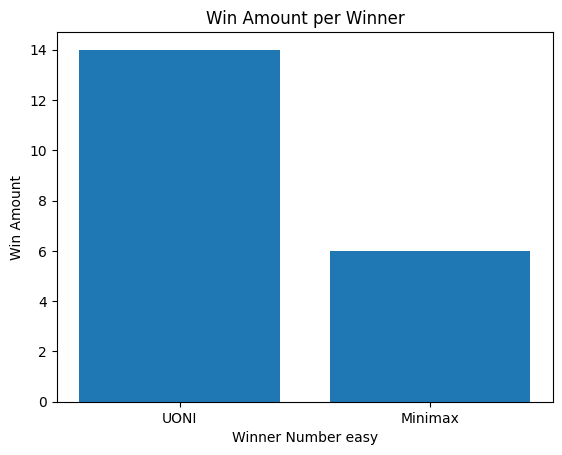

100%|██████████| 20/20 [00:01<00:00, 13.06it/s]


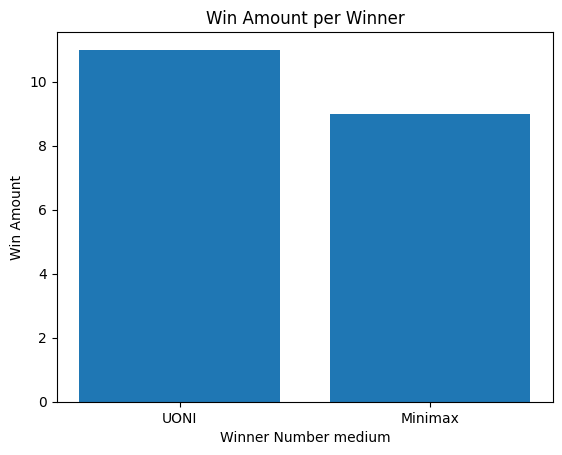

100%|██████████| 20/20 [00:02<00:00,  9.51it/s]


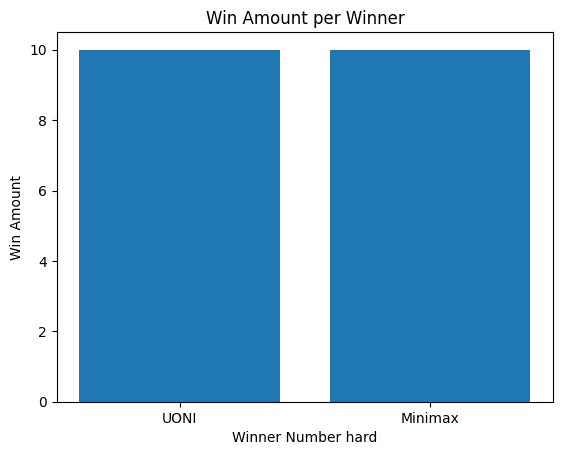

In [13]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=MinimaxAgent(2, 4), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=MinimaxAgent(1, 4), agent2=UONI(2, level), render=False))
    minimax_graph(ws[level], level)

# Expectimax

In [14]:
play_vs_other_agent(env, agent1=UONI(1, 'hard'), agent2=ExpectimaxAgent(2, 4), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   |     | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   |     | O   | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

In [15]:
play_vs_other_agent(env, agent1=RandomAgent(1), agent2=ExpectimaxAgent(2,3), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   |     |     | O   | O   | O   | O   | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

In [16]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def expectimax_graph(ws, level):
    winners = ["UONI", "Expectimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

### DEPTH = 1

100%|██████████| 20/20 [00:00<00:00, 22.57it/s]


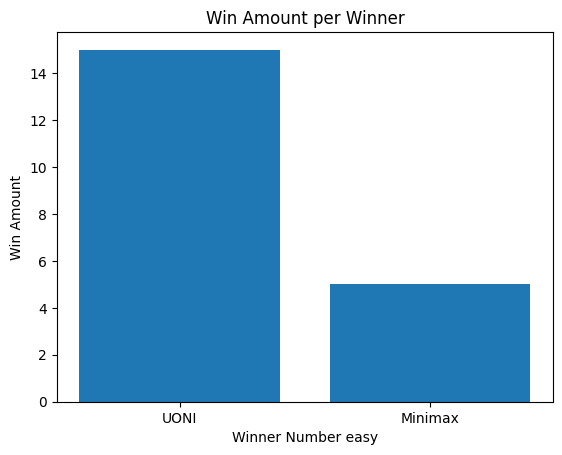

100%|██████████| 20/20 [00:01<00:00, 11.81it/s]


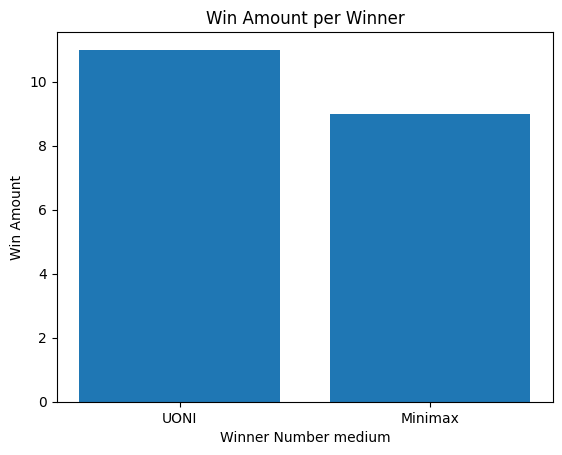

100%|██████████| 20/20 [00:02<00:00,  8.94it/s]


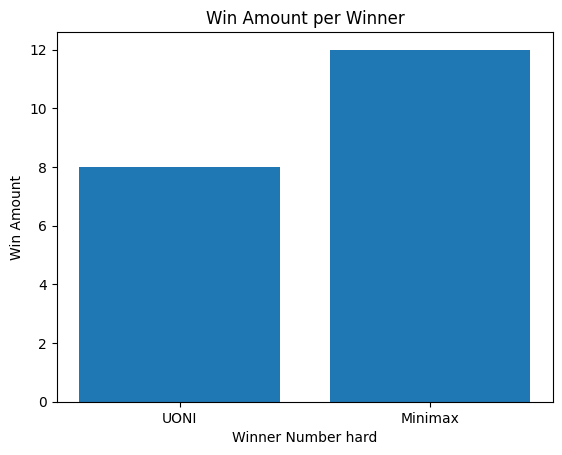

In [17]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2, 1), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1, 1), agent2=UONI(2, level), render=False))
    minimax_graph(ws[level], level)

### DEPTH = 2

100%|██████████| 20/20 [00:00<00:00, 23.66it/s]


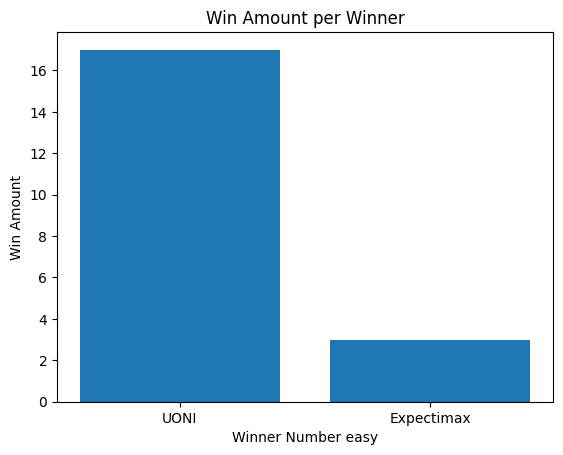

100%|██████████| 20/20 [00:01<00:00, 16.40it/s]


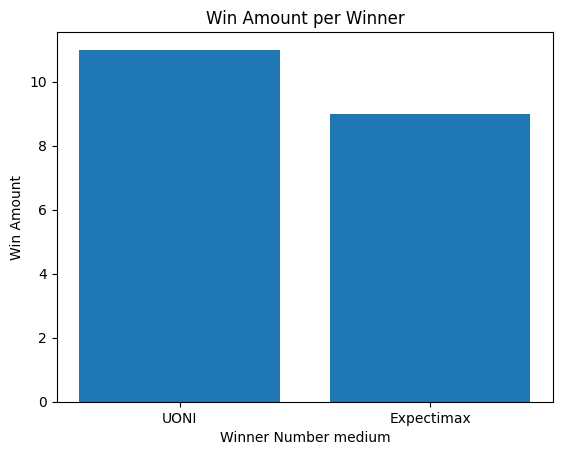

100%|██████████| 20/20 [00:02<00:00,  9.07it/s]


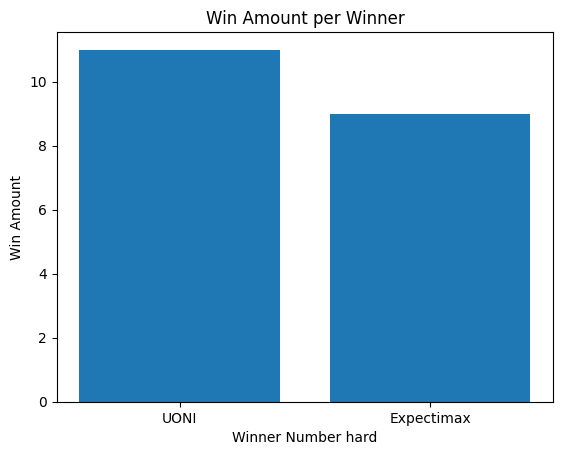

In [18]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2, 2), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1, 2), agent2=UONI(2, level), render=False))
    expectimax_graph(ws[level], level)

### DEPTH = 3

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:00<00:00, 22.03it/s]


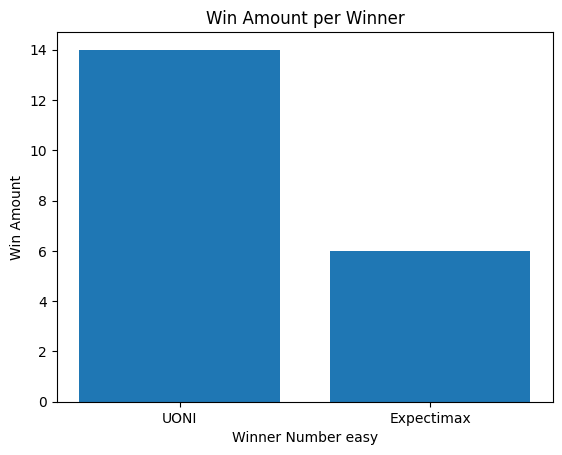

100%|██████████| 20/20 [00:01<00:00, 14.35it/s]


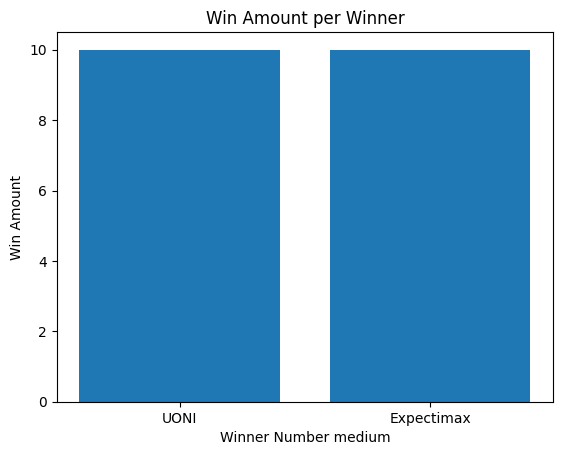

100%|██████████| 20/20 [00:02<00:00,  7.89it/s]


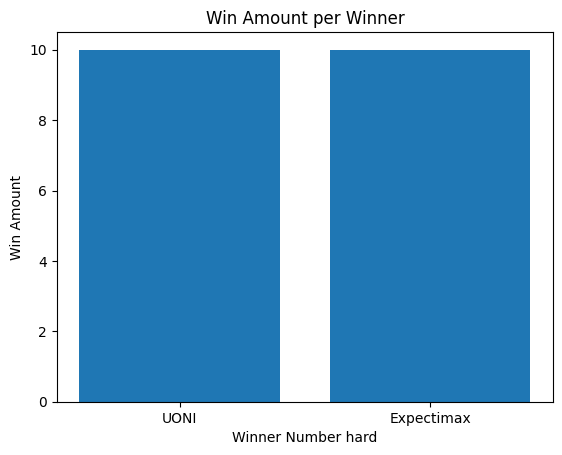

In [19]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2, 3), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1, 3), agent2=UONI(2, level), render=False))
    expectimax_graph(ws[level], level)

### DEPTH = 4

100%|██████████| 20/20 [00:00<00:00, 22.55it/s]


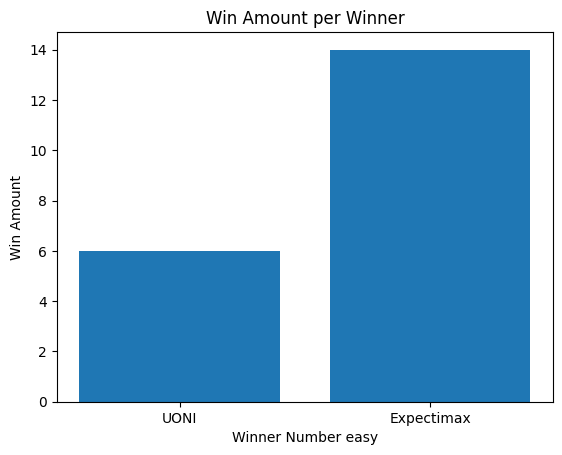

100%|██████████| 20/20 [00:01<00:00, 11.99it/s]


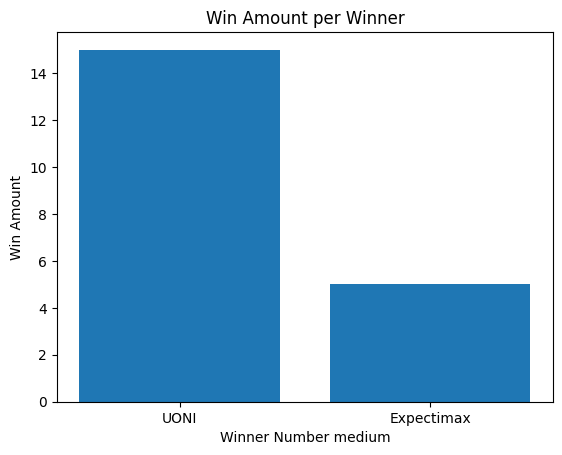

100%|██████████| 20/20 [00:02<00:00,  9.48it/s]


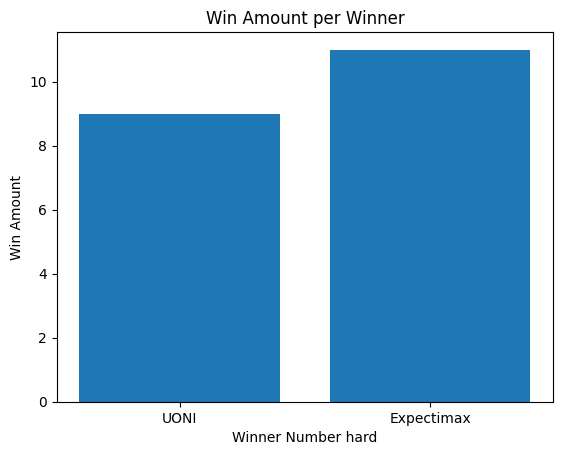

In [20]:
from tqdm import tqdm
ws = {'easy':[], 'medium':[], 'hard':[]}
for level in ['easy', 'medium', 'hard']:
    for i in tqdm(range(20)):
        if i%2 == 0:
            ws[level].append(play_vs_other_agent(env, agent1=UONI(1, level), agent2=ExpectimaxAgent(2, 4), render=False))
        else:
            ws[level].append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1, 4), agent2=UONI(2, level), render=False))
    expectimax_graph(ws[level], level)

# Minimax VS Expectimax

In [21]:
play_vs_other_agent(env, agent1=MinimaxAgent(1), agent2=ExpectimaxAgent(2), render=True)

+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 |     |     |     |     | O   |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   1 |     |     |     | O   | O   | O   |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   2 |     |     | O   | O   | O   | O   | O   |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   3 |     | O   | O   | O   | O   | O   | O   | O   |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|   4 | O   | O   | O   | O   | O   | O   | O   |     | O   |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|     | 0   | 1   | 2   | 3   | 4   | 5   | 6   | 7   | 8   |
+=====+=====+=====+=====+=====+=====+=====+=====+=====+=====+
|   0 | 

1

In [22]:
import matplotlib.pyplot as plt
# Assuming ws is a list of winners
def minimax_VS_expectimax_graph(ws):
    winners = ["Minimax", "Expectimax"]
    win_counts = [ws.count(x) for x in [1,2]]

    plt.bar(winners, win_counts)
    plt.xlabel('Winner Number ' + level)
    plt.ylabel('Win Amount')
    plt.title('Win Amount per Winner')
    plt.show()

100%|██████████| 20/20 [00:00<00:00, 65.49it/s]


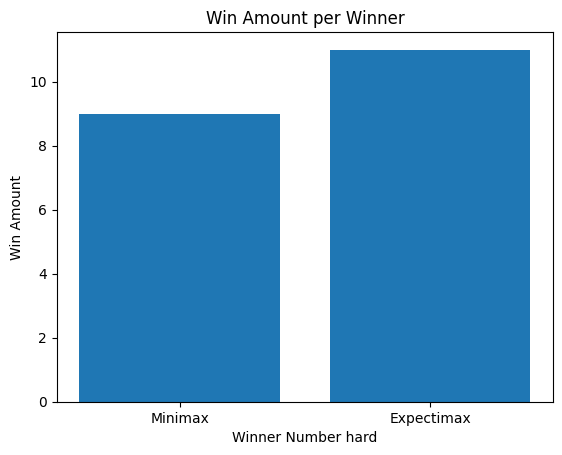

In [25]:
from tqdm import tqdm
ws = []
for i in tqdm(range(20)):
    if i%2 == 0:
        ws.append(play_vs_other_agent(env, agent1=MinimaxAgent(1), agent2=ExpectimaxAgent(2), render=False))
    else:
        ws.append(3-play_vs_other_agent(env, agent1=ExpectimaxAgent(1), agent2=MinimaxAgent(2), render=False))
minimax_VS_expectimax_graph(ws)